# LiveLab Instructor Interview | Marketing at Headspace

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/Headspace_text_logo.png"
     width="270"
     height="60" />


## Load the data
The dataset we'll be analyzing is called `headspace_data.csv`.

After importing the `pandas` library, load the dataset into a dataframe named `headspace`.

But first we need to mount our Google drive so that Colab can get access to `headspace_data.csv`.  To do this, we grab a handy code snippet from Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import pandas library
import pandas as pd

# also import some plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# load the data
headspace = pd.read_csv('/content/drive/MyDrive/Podium Education/headspace_data.csv')

# preview the data
headspace.head(10)

,user_id,registration_date,registration_platform,first_subscription_type,first_subscription_start_date,acquisition_type,first_free_trial_start_date,first_free_trial_end_date,start_date,end_date,subscription_type,payment_platform,subscription_term_months,country,free_trial,trial_length,membership_type
0,691464.0,9/25/18,IOS,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free
1,17799360.0,6/11/19,ANDROID,NaN,NaN,Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free
2,15374167.0,5/10/19,IOS,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free
3,10332087.0,11/9/18,ANDROID,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free
4,17891859.0,6/15/19,IOS,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free
5,13492103.0,1/31/19,IOS,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free
6,1136899.0,10/2/18,IOS,NaN,NaN,Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free
7,4267227.0,5/31/19,IOS,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free
8,9183589.0,10/25/18,ANDROID,NaN,NaN,Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free
9,4332170.0,6/7/19,IOS,NaN,NaN,Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free


### Explore

As a warm up, let's explore the Headspace data by seeing how many rows and columns we have and what data comprises each column.

Since the marketing team at Headspace is interested in organic and paid acquisitions, let's also see just how many of each we have in the data.

In [ ]:
# How many rows and columns are in the data?
headspace.shape

(300443, 17)

In [ ]:
# What kinds of data are in each column?
headspace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300443 entries, 0 to 300442
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   user_id                        300443 non-null  float64
 1   registration_date              300443 non-null  object 
 2   registration_platform          300443 non-null  object 
 3   first_subscription_type        20415 non-null   object 
 4   first_subscription_start_date  20415 non-null   object 
 5   acquisition_type               300443 non-null  object 
 6   first_free_trial_start_date    10582 non-null   object 
 7   first_free_trial_end_date      10542 non-null   object 
 8   start_date                     9828 non-null    object 
 9   end_date                       7481 non-null    object 
 10  subscription_type              9828 non-null    object 
 11  payment_platform               9828 non-null    object 
 12  subscription_term_months      

In [ ]:
# Are there any missing values?
headspace.isnull().sum().to_frame().rename(columns={0:'num_missing_values'})

,num_missing_values
user_id,0
registration_date,0
registration_platform,0
first_subscription_type,280028
first_subscription_start_date,280028
acquisition_type,0
first_free_trial_start_date,289861
first_free_trial_end_date,289901
start_date,290615
end_date,292962


### Customer Acquisition

 Here's the scenario: The marketing team wants to compare and evaluate the conversion rates of organic acquisitions and paid acquisitions to determine which group is more likely to become paid Headspace subscribers.

 Remember:
 - **Paid acquisition** generates traffic to Headspace via paid ads. Think: social media ads, Google ads, TV commercials, etc.
 - **Organic acquisition** generates traffic to Headspace over time for free. Think: blogging, social media, emails, referrals, etc.

In [ ]:
# How many users are there in each acquisition type?
headspace['acquisition_type'].value_counts()

,count
acquisition_type,
Organic,169428
Paid,131015


In [ ]:
# Percentage of total
headspace['acquisition_type'].value_counts(normalize=True) * 100

,proportion
acquisition_type,
Organic,56.392727
Paid,43.607273


We're going to evaluate the conversion rates of organic acquisitions and paid acquisitions separately!

Filter the data to **only organic acquisitions**. Store the filtered data in a new DataFrame called `organic` and store the number of organic acquisitions in a variable called `n_organic`.


In [ ]:
# filter to organic acquisition
organic = headspace[headspace['acquisition_type'] == 'Organic']

organic.head(10)

,user_id,registration_date,registration_platform,first_subscription_type,first_subscription_start_date,acquisition_type,first_free_trial_start_date,first_free_trial_end_date,start_date,end_date,subscription_type,payment_platform,subscription_term_months,country,free_trial,trial_length,membership_type
0,691464.0,9/25/18,IOS,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free
2,15374167.0,5/10/19,IOS,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free
3,10332087.0,11/9/18,ANDROID,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free
4,17891859.0,6/15/19,IOS,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free
5,13492103.0,1/31/19,IOS,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free
7,4267227.0,5/31/19,IOS,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free
10,12854768.0,1/13/19,IOS,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free
12,5631714.0,11/4/19,DESKTOP,NaN,NaN,Organic,11/4/19,11/22/19,NaN,NaN,NaN,NaN,NaN,NaN,1,18.0,free
13,15391398.0,5/6/19,ANDROID,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free
15,18375392.0,9/21/19,IOS,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free


In [ ]:
# use the .shape method to confirm the number of organic acquisitions
n_organic = organic.shape[0]

n_organic

169428

In [ ]:
# What is the breakdown of membership type for this group?
organic['membership_type'].value_counts()

,count
membership_type,
free,162097
paid,7331


Divide the last line of code by `n_organic` to display the *percentage* of organic acquisitions that became paid Headspace members.

In [ ]:
# display the percentage of Headspace members from organic marketing channels
organic['membership_type'].value_counts()/n_organic * 100

,count
membership_type,
free,95.673088
paid,4.326912


In [ ]:
# Another way of calculating these percentages...

organic['membership_type'].value_counts(normalize=True) * 100

,proportion
membership_type,
free,95.673088
paid,4.326912


Approximately what percentage of organic acquisitions became paid Headspace members?

**4.3%**

Next, in a similar fashion, filter the data to **only paid acquisitions**. Store the filtered data in a new DataFrame called `paid` and store the number of paid acquisitions in a variable called `n_paid`.

In [ ]:
# filter to free acquisition
paid = headspace[headspace['acquisition_type'] == 'Paid']

# use the .shape method to confirm the number of paid acquisitions
n_paid = paid.shape[0]

# What is the breakdown of membership type for this group?
paid['membership_type'].value_counts()/n_paid*100

,count
membership_type,
free,98.094111
paid,1.905889


And just as before, modify your last line of code so that you display the percentage of paid acquisitions who became paid Headspace members.

Approximately what percentage of organic acquisitions became paid Headspace members?

**1.9%**

#### Now....**a "Pythonic" approach** (by numerically encoding the `membership_type` feature) we can calculate the conversion rates for each acquisition channel with only two lines of code....

In [ ]:
headspace['paid_flag'] = headspace['membership_type'].apply(lambda x: 1 if x == 'paid' else 0)
headspace.head(10)

,user_id,registration_date,registration_platform,first_subscription_type,first_subscription_start_date,acquisition_type,first_free_trial_start_date,first_free_trial_end_date,start_date,end_date,subscription_type,payment_platform,subscription_term_months,country,free_trial,trial_length,membership_type,paid_flag
0,691464.0,9/25/18,IOS,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free,0
1,17799360.0,6/11/19,ANDROID,NaN,NaN,Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free,0
2,15374167.0,5/10/19,IOS,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free,0
3,10332087.0,11/9/18,ANDROID,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free,0
4,17891859.0,6/15/19,IOS,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free,0
5,13492103.0,1/31/19,IOS,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free,0
6,1136899.0,10/2/18,IOS,NaN,NaN,Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free,0
7,4267227.0,5/31/19,IOS,NaN,NaN,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free,0
8,9183589.0,10/25/18,ANDROID,NaN,NaN,Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free,0
9,4332170.0,6/7/19,IOS,NaN,NaN,Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,free,0


In [ ]:
conversion_table = pd.DataFrame(headspace.groupby('acquisition_type')['paid_flag'].mean().rename('conversion_rate')*100)
conversion_table

,conversion_rate
acquisition_type,
Organic,4.326912
Paid,1.905889


Let's generate a column chart to show the difference in conversion rates.

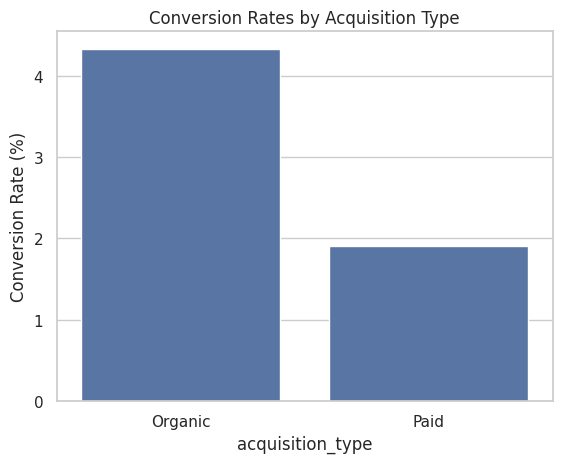

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(x=conversion_table.index, y=conversion_table['conversion_rate'])
plt.title('Conversion Rates by Acquisition Type')
plt.ylabel('Conversion Rate (%)')
plt.show()

What do you notice? Is there a higher percentage of paid subscribers who came from *organic marketing channels* or of paid subscribers who came from *paid marketing channels*?



Based on your answer to the previous question, what’s your recommendation to the marketing team at Headspace?

#### **Future Work:** conduct a $z$-test on the dataset to determine if the difference in conversion rates between `Organic` and `Paid` acquisition is statistically significant.